# Assignment on PCA and Clustering

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

### Importing the required libraries

In [2]:
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Importing the dataset

In [3]:
countries = pd.read_csv("Country-data.csv")
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Checking the properties for the numerical variables

In [4]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### For all numerical columns, plotting the box plot and removing outliers if any

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c0b9b70>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c0d0470>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c0b9a20>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c0d0cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c0d7128>],
 'means': []}

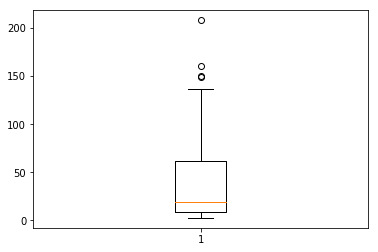

In [5]:
plt.boxplot(countries['child_mort'])

In [6]:
Q1 = countries.child_mort.quantile(0.05)
Q3 = countries.child_mort.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.child_mort >= Q1 - 1.5*IQR) & (countries.child_mort <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c142f98>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c14c898>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c142e48>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c154128>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c154550>],
 'means': []}

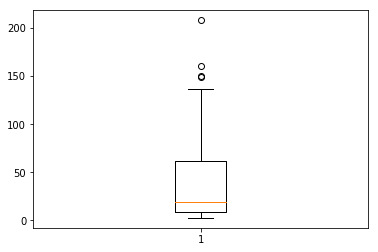

In [7]:
plt.boxplot(countries['child_mort'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c19ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c1a8780>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c19cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c1a8fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c1b1438>],
 'means': []}

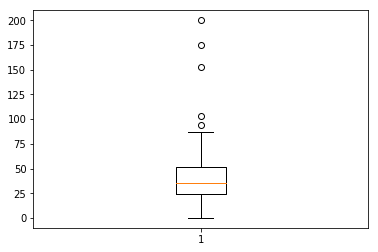

In [8]:
plt.boxplot(countries['exports'])

In [9]:
Q1 = countries.exports.quantile(0.05)
Q3 = countries.exports.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.exports >= Q1 - 1.5*IQR) & (countries.exports <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c20a828>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c213128>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c20a6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c213978>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c213da0>],
 'means': []}

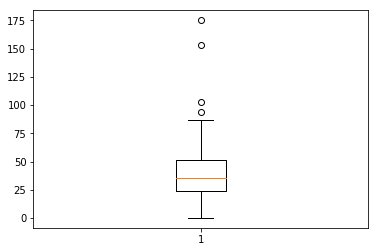

In [10]:
plt.boxplot(countries['exports'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c270358>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c270c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c270208>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c2794a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c2798d0>],
 'means': []}

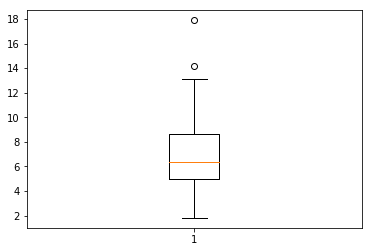

In [11]:
plt.boxplot(countries['health'])

In [12]:
Q1 = countries.health.quantile(0.05)
Q3 = countries.health.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.health >= Q1 - 1.5*IQR) & (countries.health <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c2d3358>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c2d3c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c2d3208>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c2da4a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c2da8d0>],
 'means': []}

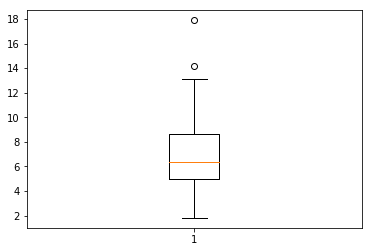

In [13]:
plt.boxplot(countries['health'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c32be10>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c334710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c32bcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c334f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c33e3c8>],
 'means': []}

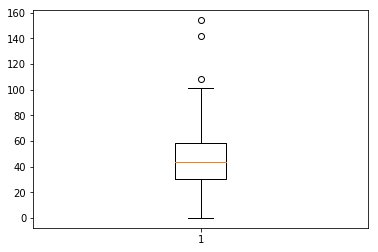

In [14]:
plt.boxplot(countries['imports'])

In [15]:
Q1 = countries.imports.quantile(0.05)
Q3 = countries.imports.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.imports >= Q1 - 1.5*IQR) & (countries.imports <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c395048>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c395908>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c38beb8>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c39d198>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c39d5c0>],
 'means': []}

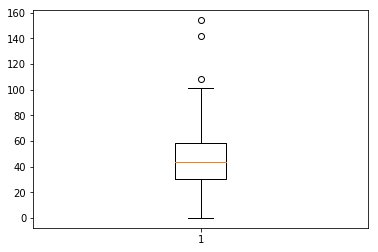

In [16]:
plt.boxplot(countries['imports'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c3eee48>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c3f8748>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c3eecf8>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c3f8f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c401400>],
 'means': []}

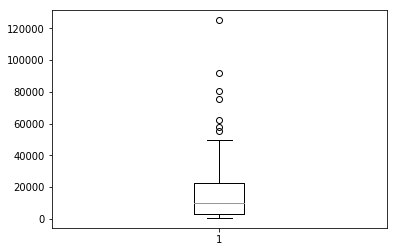

In [17]:
plt.boxplot(countries['income'])

In [18]:
Q1 = countries.income.quantile(0.05)
Q3 = countries.income.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.income >= Q1 - 1.5*IQR) & (countries.income <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c44f748>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c45a048>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c44f5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c45a898>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c45acc0>],
 'means': []}

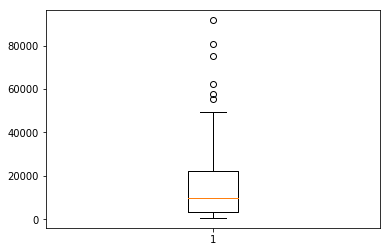

In [19]:
plt.boxplot(countries['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c4ab0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c4ab9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c4a2f60>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c4b2240>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c4b2668>],
 'means': []}

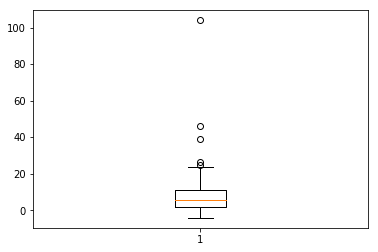

In [20]:
plt.boxplot(countries['inflation'])

In [21]:
Q1 = countries.inflation.quantile(0.05)
Q3 = countries.inflation.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.inflation >= Q1 - 1.5*IQR) & (countries.inflation <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c4fdb70>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c509470>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c4fda20>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c509cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c510128>],
 'means': []}

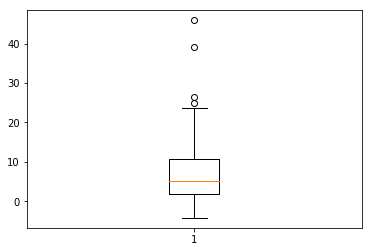

In [22]:
plt.boxplot(countries['inflation'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c555b00>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c55c400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c5559b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c55cc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c5690b8>],
 'means': []}

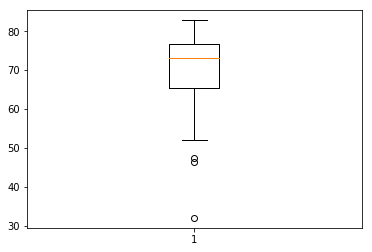

In [23]:
plt.boxplot(countries['life_expec'])

In [24]:
Q1 = countries.life_expec.quantile(0.05)
Q3 = countries.life_expec.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.life_expec >= Q1 - 1.5*IQR) & (countries.life_expec <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c5ae240>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c5aeb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c5ae0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c5b7390>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c5b77b8>],
 'means': []}

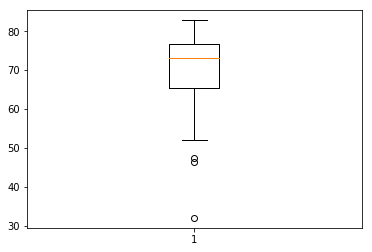

In [25]:
plt.boxplot(countries['life_expec'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c606208>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c606ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c6060b8>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c60f358>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c60f780>],
 'means': []}

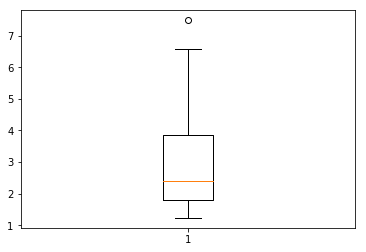

In [26]:
plt.boxplot(countries['total_fer'])

In [27]:
Q1 = countries.total_fer.quantile(0.05)
Q3 = countries.total_fer.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.total_fer >= Q1 - 1.5*IQR) & (countries.total_fer <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c6605f8>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c660eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c6604a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c668748>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c668b00>],
 'means': []}

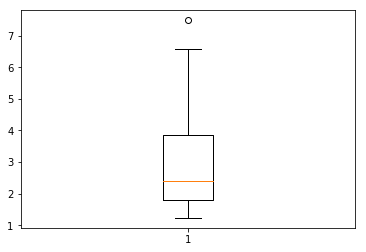

In [28]:
plt.boxplot(countries['total_fer'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c6b8588>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c6b8e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c6b8438>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c6c36d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c6c3b00>],
 'means': []}

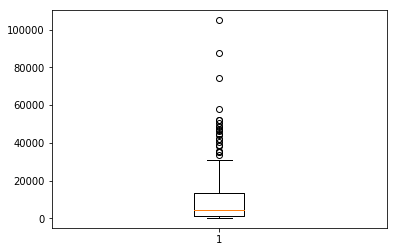

In [29]:
plt.boxplot(countries['gdpp'])

In [30]:
Q1 = countries.gdpp.quantile(0.05)
Q3 = countries.gdpp.quantile(0.95)
IQR = Q3 - Q1
countries = countries[(countries.gdpp >= Q1 - 1.5*IQR) & (countries.gdpp <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2921c710a20>,
 'caps': [<matplotlib.lines.Line2D at 0x2921c719320>,
 'boxes': [<matplotlib.lines.Line2D at 0x2921c7108d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2921c719b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2921c719f98>],
 'means': []}

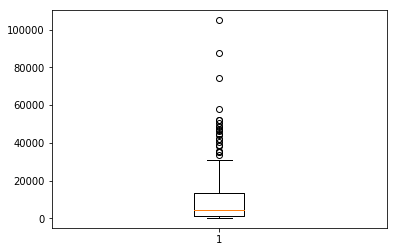

In [31]:
plt.boxplot(countries['gdpp'])

#### Removing the country name column

In [32]:
name=countries.pop('country')

## Scaling the dataset

In [33]:
scaler = StandardScaler()

In [34]:
X = countries.copy()

In [35]:
x = scaler.fit_transform(X)

In [36]:
x[:5,:5]

array([[ 1.30973967, -1.22771955,  0.25921146, -0.06966572, -0.86556086],
       [-0.54068249, -0.49371339, -0.119102  ,  0.09817422, -0.37281866],
       [-0.27166731, -0.06962093, -0.99326321, -0.68205468, -0.1969239 ],
       [ 2.03381791,  0.90497615, -1.47809211, -0.16039001, -0.61149066],
       [-0.6990746 ,  0.21990372, -0.31009521,  0.56540431,  0.17026379]])

#### Generating PCA for the dataset

In [37]:
pca = PCA(random_state=34)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=34,
  svd_solver='auto', tol=0.0, whiten=False)

#### Checking the PCA components and their variance ratio

In [38]:
pca.components_

array([[-0.41707142,  0.26416786,  0.18768908,  0.13037811,  0.41046939,
        -0.19325685,  0.42525158, -0.4006349 ,  0.39605627],
       [ 0.16626965,  0.60959466, -0.14025508,  0.71387142, -0.01780182,
        -0.06583848, -0.2178763 ,  0.13068815, -0.04757916],
       [-0.17969762,  0.23818157, -0.67428713, -0.17159462,  0.1205389 ,
         0.60477777,  0.15830297, -0.11626924, -0.08947802],
       [ 0.34764414,  0.09856524,  0.19229972, -0.17589757,  0.47140389,
         0.33594745, -0.18172433,  0.38900432,  0.531111  ],
       [-0.18183315, -0.01302907,  0.60352928,  0.2518542 , -0.19656821,
         0.67595776,  0.05069234, -0.10140126, -0.17515404],
       [ 0.21153109, -0.04075914,  0.00361447, -0.05029309,  0.15419872,
         0.05496542, -0.60272783, -0.74866795,  0.02162972],
       [-0.06947963, -0.68136406, -0.28952827,  0.57355282,  0.08180463,
         0.11899188,  0.00187661,  0.01061626,  0.31170314],
       [ 0.72455736,  0.01039262, -0.0157946 ,  0.05284916, -0

In [39]:
pca.explained_variance_ratio_

array([0.46176255, 0.1699294 , 0.13516563, 0.10906535, 0.06795329,
       0.0254524 , 0.01460331, 0.00919995, 0.00686812])

#### Checking the cumulative summary on a plot to get the number of components needed for building the model

<BarContainer object of 9 artists>

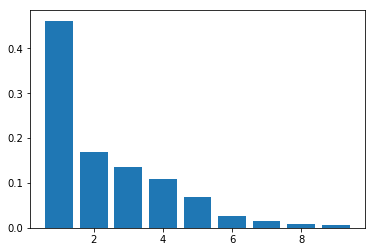

In [40]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [41]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

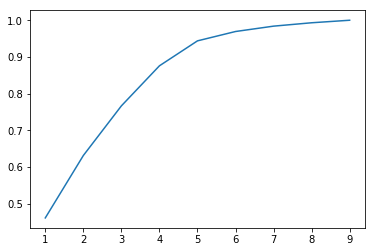

In [42]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

Now, at 5, we can observe 95% of the variance, we can use 5 components to build the model

### Generating the PCA components again with 5 component size

In [43]:
pc2 = PCA(n_components=5, random_state=34)
newdata = pc2.fit_transform(x)

In [44]:
newdata.shape

(164, 5)

### Creating a new dataframe out of the 5 generated PCA components

In [45]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2","PC3","PC4","PC5"])
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.966365,0.014543,-1.036420,0.768485,0.126626
1,0.442288,-0.507039,0.022429,-1.284641,0.085977
2,-0.365026,-0.641205,1.663468,-0.247008,0.235243
3,-3.109768,1.420818,1.634979,1.711483,-0.013499
4,1.101124,0.286844,0.019053,-0.911061,-0.384417


### Drop null rows if any

In [46]:
df = df.dropna()

In [47]:
df.shape

(164, 5)

## Performing K-Means Clustering on the dataset

## Finding the Optimal Number of Clusters
### SSD

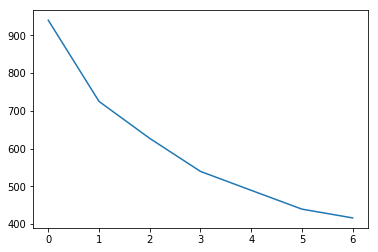

In [48]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Using Silhoutte Analysis to find the optimal number of clusters

In [49]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.29476062148370336
For n_clusters=3, the silhouette score is 0.2953780315630965
For n_clusters=4, the silhouette score is 0.2572823622601067
For n_clusters=5, the silhouette score is 0.270367942352793
For n_clusters=6, the silhouette score is 0.2656093103350917
For n_clusters=7, the silhouette score is 0.27391828323892786
For n_clusters=8, the silhouette score is 0.2444459984502819


Here we found out that with 3 clusters we get the maximum information from the clusters.
We can go with 3 as it can also go well with the business requirement. 
There can be 3 categories of countries. Namely, Under-developed, developing and developed.
The CEO of HELP can focus on the under-developed countries first

In [50]:
#Copying the data set and keeping for hierarchichal clustering
Y=df.copy()
Z=df.copy()

### Building the model with 3 clusters

In [51]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Checking the labels

In [52]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

### Assigning the labels to the data

In [53]:
df['cluster_id'] = kmeans.labels_
df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id
0,-2.966365,0.014543,-1.036420,0.768485,0.126626,1
1,0.442288,-0.507039,0.022429,-1.284641,0.085977,2
2,-0.365026,-0.641205,1.663468,-0.247008,0.235243,2
3,-3.109768,1.420818,1.634979,1.711483,-0.013499,1
4,1.101124,0.286844,0.019053,-0.911061,-0.384417,2


### Assigning the country names to the data that we removed earlier

In [54]:
df['name']=name
df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,name
0,-2.966365,0.014543,-1.036420,0.768485,0.126626,1,Afghanistan
1,0.442288,-0.507039,0.022429,-1.284641,0.085977,2,Albania
2,-0.365026,-0.641205,1.663468,-0.247008,0.235243,2,Algeria
3,-3.109768,1.420818,1.634979,1.711483,-0.013499,1,Angola
4,1.101124,0.286844,0.019053,-0.911061,-0.384417,2,Antigua and Barbuda


### Plotting the box plots of the generated PCA with respect to different clusters

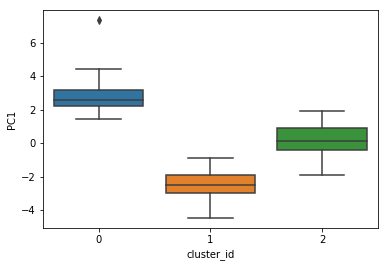

In [55]:
# plot
sns.boxplot(x='cluster_id', y='PC1', data=df)

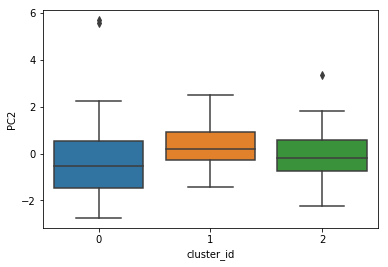

In [56]:
# plot
sns.boxplot(x='cluster_id', y='PC2', data=df)

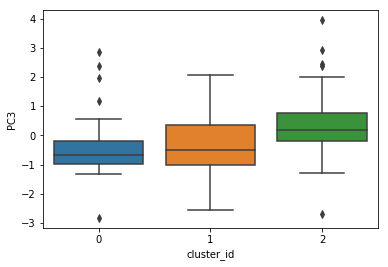

In [57]:
# plot
sns.boxplot(x='cluster_id', y='PC3', data=df)

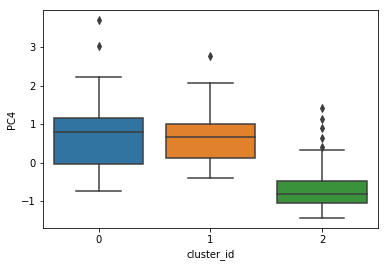

In [58]:
# plot
sns.boxplot(x='cluster_id', y='PC4', data=df)

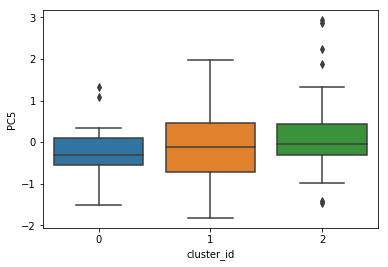

In [59]:
# plot
sns.boxplot(x='cluster_id', y='PC5', data=df)

### Plotting the box plot of gdpp for different clusters

In [60]:
df['gdpp']=countries['gdpp']

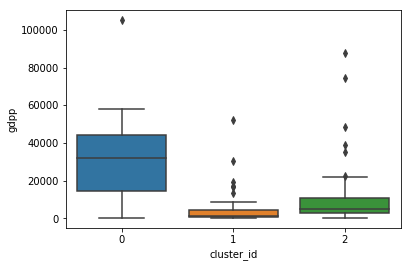

In [61]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=df)

### Plotting the box plot of child_mort for different clusters

In [62]:
df['child_mort']=countries['child_mort']

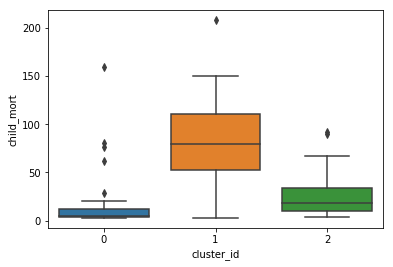

In [63]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=df)

### Plotting the box plot of income for different clusters

In [64]:
df['income']=countries['income']

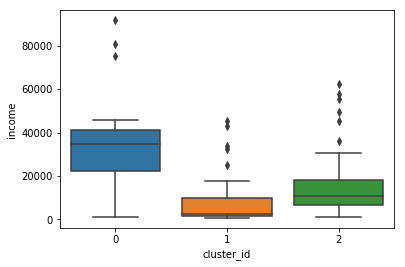

In [65]:
# plot
sns.boxplot(x='cluster_id', y='income', data=df)

### Getting the countries that need help

In [66]:

help_cluster_id = pd.Series.idxmin(df.groupby(by='cluster_id')['income'].median())

In [67]:
countries_need_help_kmeans = df[df['cluster_id']==help_cluster_id]['name']
len(countries_need_help_kmeans)

46

### Hierarchical Clustering

#### Hierarchichal Clustering using single linkage 

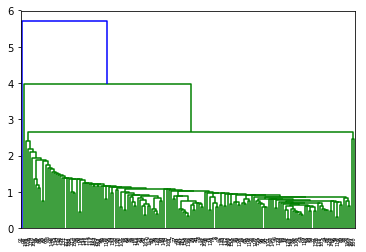

In [790]:
# single linkage
mergings = linkage(Y, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [791]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [792]:
# assign cluster labels
Y['cluster_labels'] = cluster_labels
Y.head()

,PC1,PC2,PC3,PC4,PC5,cluster_labels
0,-2.966365,0.014543,-1.036420,0.768485,0.126626,0
1,0.442288,-0.507039,0.022429,-1.284641,0.085977,0
2,-0.365026,-0.641205,1.663468,-0.247008,0.235243,0
3,-3.109768,1.420818,1.634979,1.711483,-0.013499,0
4,1.101124,0.286844,0.019053,-0.911061,-0.384417,0


#### Adding back the old columns

In [793]:
Y['name'] = name
Y['gdpp']=countries['gdpp']
Y['child_mort']=countries['child_mort']
Y['income']=countries['income']

#### Plotting the cluster with respect to income, gdpp and child_mort

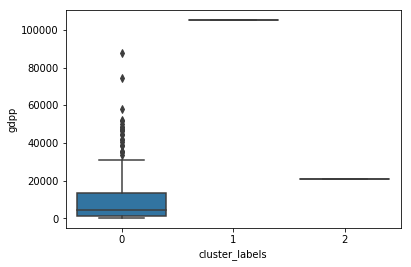

In [794]:
# plot
sns.boxplot(x='cluster_labels', y='gdpp', data=Y)

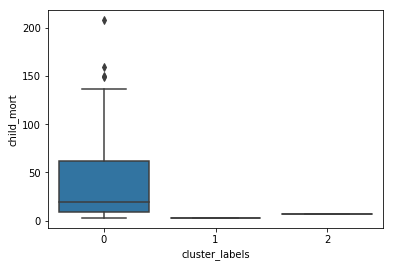

In [795]:

# plot
sns.boxplot(x='cluster_labels', y='child_mort', data=Y)

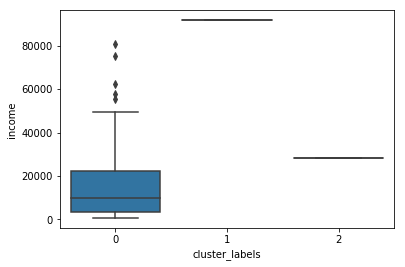

In [796]:

# plot
sns.boxplot(x='cluster_labels', y='income', data=Y)

#### Hierarchical Clustering using complete linkage

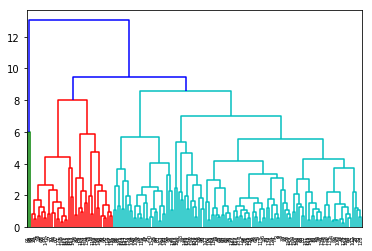

In [797]:
# complete linkage
mergings = linkage(Z, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [798]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [799]:
# assign cluster labels
Z['cluster_labels'] = cluster_labels
Z.head()

,PC1,PC2,PC3,PC4,PC5,cluster_labels
0,-2.966365,0.014543,-1.036420,0.768485,0.126626,0
1,0.442288,-0.507039,0.022429,-1.284641,0.085977,0
2,-0.365026,-0.641205,1.663468,-0.247008,0.235243,0
3,-3.109768,1.420818,1.634979,1.711483,-0.013499,0
4,1.101124,0.286844,0.019053,-0.911061,-0.384417,0


#### Assigning back the old columns

In [800]:
Z['name']=name
Z['income']=countries['income']
Z['gdpp']=countries['gdpp']
Z['child_mort']=countries['child_mort']

#### Plotting the clusters with respect to income, gdpp and child_mort

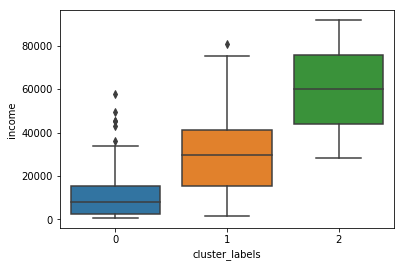

In [801]:
# plot
sns.boxplot(x='cluster_labels', y='income', data=Z)

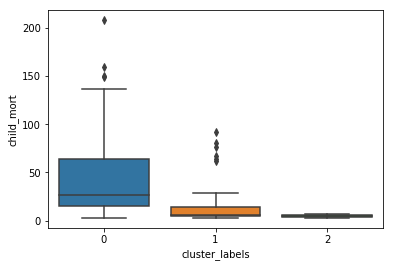

In [802]:
# plot
sns.boxplot(x='cluster_labels', y='child_mort', data=Z)

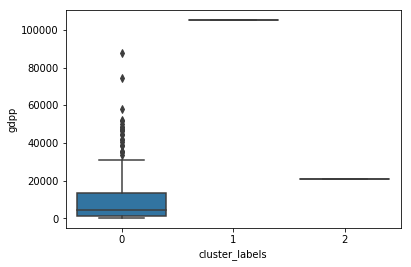

In [803]:
# plot
sns.boxplot(x='cluster_labels', y='gdpp', data=Y)

#### Getting the cluster Id of the under-developed countries

In [805]:
help_cluster_id_y = pd.Series.idxmin(Y.groupby(by='cluster_labels')['income'].median())
help_cluster_id_z = pd.Series.idxmin(Z.groupby(by='cluster_labels')['income'].median())

#### Getting the under_developed countries according to the single and complete hierarchichal clustering

In [806]:
countries_need_help_single = Y[Y['cluster_labels']==help_cluster_id_y]['name']
countries_need_help_complete = Z[Z['cluster_labels']==help_cluster_id_z]['name']

In [810]:
countries_need_help_single

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
7                           Australia
8                             Austria
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
15                            Belgium
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
23                             Brunei
24                           Bulgaria
25                       Burkina Faso
26          

In [812]:
countries_need_help_complete

0                   Afghanistan
1                       Albania
2                       Algeria
3                        Angola
4           Antigua and Barbuda
5                     Argentina
6                       Armenia
9                    Azerbaijan
12                   Bangladesh
13                     Barbados
14                      Belarus
16                       Belize
17                        Benin
18                       Bhutan
19                      Bolivia
20       Bosnia and Herzegovina
21                     Botswana
22                       Brazil
24                     Bulgaria
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
30                   Cape Verde
31     Central African Republic
32                         Chad
33                        Chile
34                        China
35                     Colombia
36                      Comoros
                 ...           
124     

#### Common countries identified by single and complete hierarchichal clustering

In [ ]:
countries_need_help_hierarchichal = set(countries_need_help_single) & set(countries_need_help_complete)
countries_need_help_hierarchichal

#### Common countries that are identified by the hierarchichal and k means clustering

In [807]:
final_help_countries = set(countries_need_help_hierarchichal) & set(countries_need_help_kmeans)

In [808]:
final_help_countries

{'Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Oman',
 'Romania',
 'Samoa',
 'Serbia',
 'Slovak Republic',
 'Spain',
 'Sweden',
 'Tajikistan',
 'Tanzania',
 'Tunisia',
 'Vanuatu',
 'Venezuela'}

In [809]:
len(final_help_countries)

46

Now, It is found that the countries that are identified by kmeans are also identified by hierarchical as under developed. The CEO of HELP should focus more on these 46 countries for development.